In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 不平衡数据（Imbalanced datasets）


分类问题中，当不同类别的样本量差异很大，即类分布不平衡时，很容易影响分类结果。


尤其是，在解决**识别**问题的时候。把识别问题转换成分类问题。

在分类等问题中，在数据集中，呈阳性样本和呈阴性样本数量比例有较大差距。

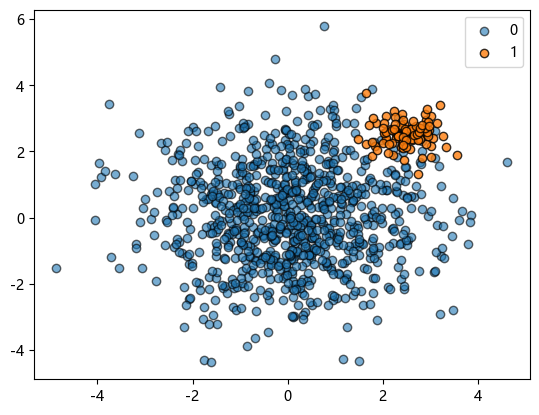

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=[900, 100],
                  centers=[
                      [0.0, 0.0], [2.5, 2.5]
                  ],
                  cluster_std=[1.5, 0.4],
                  random_state=42, shuffle=False)


plt.scatter(X[y==0, 0], X[y==0, 1], ec="k", alpha=0.6, label="0")
plt.scatter(X[y==1, 0], X[y==1, 1], ec="k", alpha=0.8, label="1")
plt.legend()
plt.show()

```
```

如果我们采用支持向量机模型完成上面的分类

training accuracy: 0.9773333333333334
 testing accuracy: 0.964


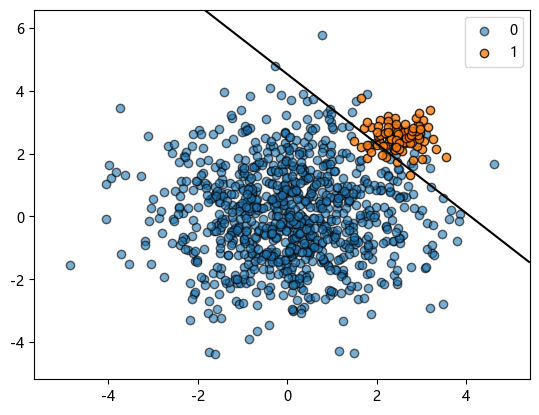

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from plot_helper import plot_2d_separator

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model1 = SVC(kernel="linear", C=1)
model1.fit(X_train, y_train)


from sklearn.metrics import accuracy_score

print("training accuracy:", accuracy_score(y_train, model1.predict(X_train)))
print(" testing accuracy:", accuracy_score(y_test, model1.predict(X_test)))

ax = plt.gca()
ax.scatter(X[y==0, 0], X[y==0, 1], ec="k", alpha=0.6, label="0")
ax.scatter(X[y==1, 0], X[y==1, 1], ec="k", alpha=0.8, label="1")
plot_2d_separator(model1, X_train)
ax.legend()
plt.show()

<br />
解决不平衡数据一种常见的方法就是对样本进行加权，对训练集里的每个类别加一个权重。如果该类别的样本数多，那么它的权重就低，反之则权重就高。

例如，下面使用了模型的`class_weight`参数，指定分类标签为`0`的样本权重是$0.1$，标签为`1`的权重是$0.9$。


不同模型对加权的处理方法不同，例如，支持向量是对样本的松弛变量进行加权，$class\_weight_i \cdot C \cdot \zeta_i$。

training accuracy: 0.9533333333333334
 testing accuracy: 0.956


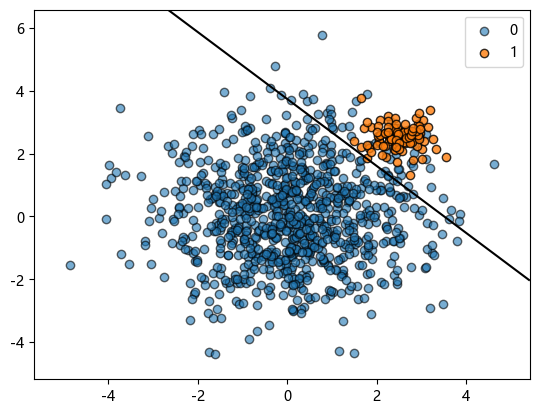

In [6]:
model2 = SVC(kernel="linear", C=1, class_weight={0: 0.1, 1: 0.9})
model2.fit(X, y)

print("training accuracy:", accuracy_score(y_train, model2.predict(X_train)))
print(" testing accuracy:", accuracy_score(y_test, model2.predict(X_test)))


ax = plt.gca()
from plot_helper import axline, plot_2d_separator
ax.scatter(X[y==0, 0], X[y==0, 1], ec="k", alpha=0.6, label="0")
ax.scatter(X[y==1, 0], X[y==1, 1], ec="k", alpha=0.8, label="1")

plot_2d_separator(model2, X_train)
ax.legend()
plt.show()

虽然就分割线来看，设定加权后，分类效果要好，但是`accuracy`相比未加权前，要低。



```
```


在极端情况下，例如，在给用户展示100个广告里，可能被点击的也就有1个，若是预测点击行为（识别点击），也就说，阳性(positive)数据（被点击的数据）比阴性(negative)数据（未点击的）数量之比是$1:99$。

如果预测结论一刀切，一律说“不点击”，其accuracy也有$\frac{99}{100}=99\%$

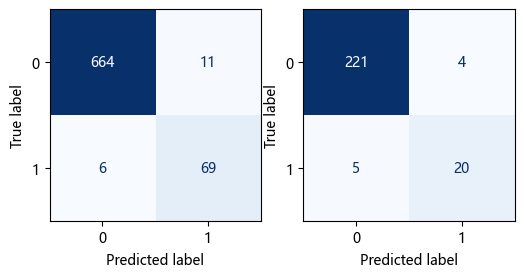

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(6,4), dpi=100)
ConfusionMatrixDisplay.from_estimator(model1, X_train, y_train, cmap="Blues", ax=axes[0], colorbar=False)
ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test, cmap="Blues", ax=axes[1], colorbar=False)
plt.show()

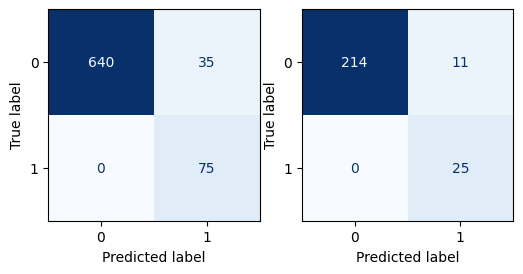

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(6,4), dpi=100)
ConfusionMatrixDisplay.from_estimator(model2, X_train, y_train, cmap="Blues", ax=axes[0], colorbar=False)
ConfusionMatrixDisplay.from_estimator(model2, X_test, y_test, cmap="Blues", ax=axes[1], colorbar=False)
plt.show()

## 混淆矩阵(Confusion matrices)

混淆矩阵(confusion matrix)的每一列代表一个类的实例预测，而每一行表示一个实际的类的实例。之所以如此命名，是因为通过这个矩阵可以方便地看出机器是否将两个不同的类混淆了（比如说把一个类错当成了另一个）。

对于二分类(Binary Classification)问题，我们通常一类是阳性(positive class)和阴性(negative class)。
一般情况下，分类的初衷是为了识别，我们更关心二分类中的某类，我们称之为阳性类，与此相对，阴性类。


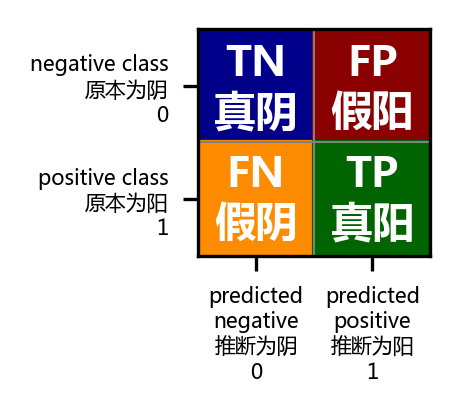

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix_figure(dpi=300):
    plt.figure(figsize=(1, 1), dpi=dpi)
    box = np.array([[0,0], [0.5, 0], [0.5, 0.5], [0, 0.5]])
    plt.fill(box[:,0], box[:,1] + 0.5, c='darkblue')
    plt.fill(box[:,0] + 0.5, box[:,1] + 0.5,  c='darkred')
    plt.fill(box[:,0], box[:,1],  c='darkorange')
    plt.fill(box[:,0] + 0.5, box[:,1], c='darkgreen')
    
    plt.text(0.25, 0.58, 'TN\n真阴', size=10, fontweight=1000, c="w", horizontalalignment='center')
    plt.text(0.25, 0.09, 'FN\n假阴', size=10, fontweight=1000, c="w", horizontalalignment='center')
    plt.text(0.75, 0.58, 'FP\n假阳', size=10, fontweight=1000, c="w", horizontalalignment='center')
    plt.text(0.75, 0.09, 'TP\n真阳', size=10, fontweight=1000, c="w", horizontalalignment='center')

    plt.xticks([.25, .75], ["predicted\nnegative\n推断为阴\n0", "predicted\npositive\n推断为阳\n1"], size=5)
    plt.yticks([.25, .75], ["positive class\n原本为阳\n1", "negative class\n原本为阴\n0"], size=5)
    plt.plot([.5, .5], [0, 1], '-', c='grey', linewidth=0.5)
    plt.plot([0, 1], [.5, .5], '-', c='grey', linewidth=0.5)

    plt.xlim(0, 1)
    plt.ylim(0, 1)

plot_confusion_matrix_figure()

### 错误类型

* 假阳性(false positive)，错误的预测为阳性，第一类错误(Type I Error)
* 假阴性(false negtive)，错误预测为阴性，第二类错误(Type II Error)

### 准确率(Accuracy)
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

### 正确率、精确率(**Precision**)

在所有推断、预测的结果中，其中正确的所占比率。
    
\begin{align}
\text{Precision} &= \frac{\text{TP}}{\text{TP} + \text{FP}}\\
\end{align}


### 召回率(**Recall**)、 灵敏度(Sensitivity)、真阳率(True Positive Rate, TPR) 

在所有为阳性记录中，找到或推断为阳性的比率。例如，所有相关文档中，被检索到的比率。

\begin{align}
\mathrm{Recall} = \frac{\mathrm{TP}}{\mathrm{P}} = \frac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FN}}
\end{align}


###  假阳性率(False Positice Rate，FPR)，误报率，误诊率

在实际呈阴性样本中，预测错误的比例，即误判为呈阳性的比例。

\begin{equation}
\text{FPR} = \frac{FP}{N} =  \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}


### $F_1\text{-score}$、$F\text{-score}$或者$F\text{-measure}$

$F$分值可以看作$\text{precision}$和$\text{recall}$的调和平均值(harmonic mean)

\begin{align}
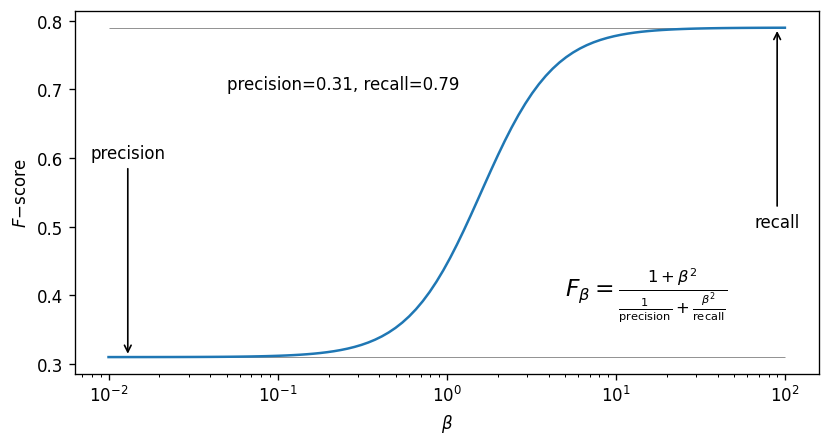= 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}
=\frac{2}{\frac{1}{\mathrm{precision}} + \frac{1}{\mathrm{recall}} }
=\frac{2\mathrm{TP}}{2\mathrm{TP} + \mathrm{FP} + \mathrm{FN}}
\end{align}

### $F_\beta\text{-score}$的一般形式

$\beta$值越大，表示召回率比查准率更为重要；$\beta$值越小，查准率比召回率更重要。
    
$$
F_{\beta }=(1+\beta ^{2})\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{\beta ^{2}\cdot \mathrm {precision} +\mathrm {recall} }}
=\frac{1+\beta^2}{\frac{1}{\mathrm{precision}} + \frac{\beta^2}{\mathrm{recall}} }
= \frac {(1 + \beta^2) \cdot \mathrm{TP} }{(1 + \beta^2) \cdot \mathrm{TP} + \beta^2 \cdot \mathrm{FN} + \mathrm{FP}}\,
$$



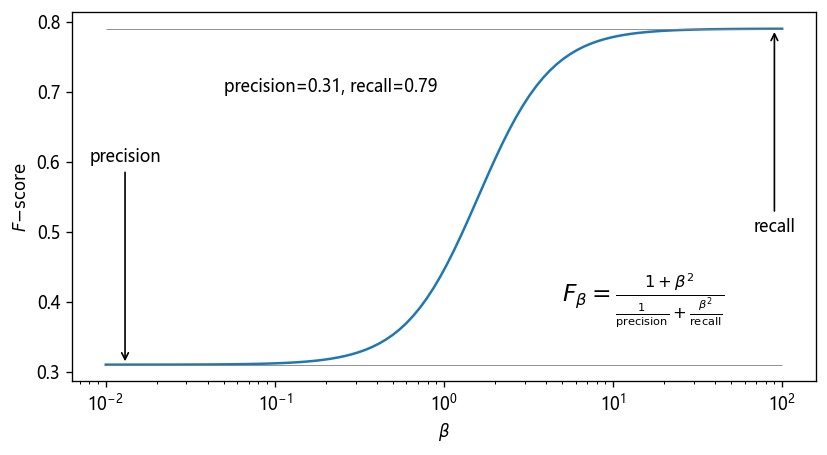

In [9]:
def draw_fbeta_score():
    fbeta = lambda p, r, b: (1+b**2)*p*r/(b**2*p+r)

    precision, recall = 0.31, 0.79
    xx = np.logspace(-2, 2, 100, endpoint=True)
    yy = np.vectorize(fbeta)(precision, recall, xx)

    plt.plot(xx, yy)
    plt.xscale('log')
    plt.ylabel(r'$F\mathrm{-score}$'); plt.xlabel(r'$\beta$');

    plt.hlines(precision, xx[0], xx[-1], linewidth=0.5, color='grey')
    plt.hlines(recall, xx[0], xx[-1], linewidth=0.5, color='grey')
    #plt.vlines(1, recall, precision, '--')
    plt.annotate('precision', xy=(0.013, precision), xytext=(0.013, 0.6), 
                 horizontalalignment='center',
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

    plt.annotate('recall', xy=(90, recall), xytext=(90, 0.5), 
                 horizontalalignment='center',
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    plt.text(0.05, 0.7, f"precision=0.31, recall=0.79")
    plt.text(5, 0.4, 
             r'$F_\beta=\frac{1+\beta^2}{\frac{1}{\mathrm{precision}} + \frac{\beta^2}{\mathrm{recall}} }$', 
             size=14)


plt.figure(figsize=(8, 4), dpi=120)
draw_fbeta_score();

# 二分类模型的评价指标(Metrics) 


在机器学习中，我们常用假阳性和假阴性，比第一类错误和第二类错误更为直观。


### 实例： 字符识别

In [10]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

print("shape: ", digits.data.shape)

shape:  (1797, 64)


In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [12]:
digits.data[0,:].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

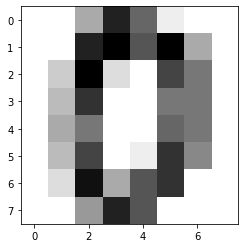

In [13]:
plt.imshow(digits.data[0,:].reshape(8,8), cmap=plt.cm.binary)

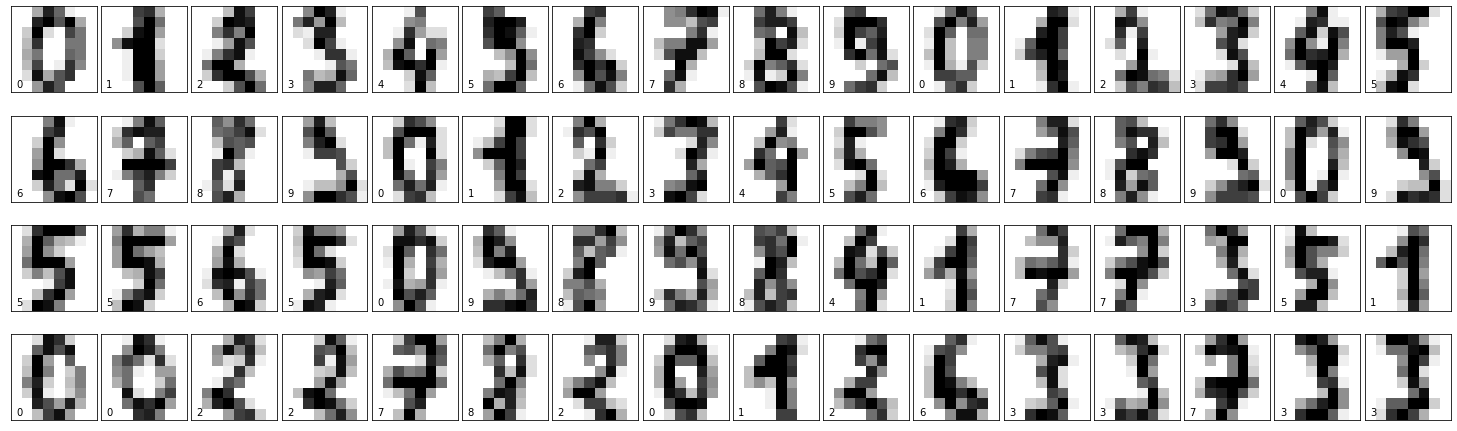

In [6]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(4, 16, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.data[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

识别是$9$的数字

In [3]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y,  stratify=y, random_state=0)

In [12]:
X_train.shape

(1347, 64)

In [4]:

import numpy as np
import pandas as pd
pd.DataFrame(np.bincount(y).reshape(1,-1), columns=['False', 'True'])

,False,True
0,1617,180


In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

pred_tree = tree.predict(X_test)


from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f"Test accuracy: {accuracy_score(y_test, tree.predict(X_test)):.2f}")
print(f"Test precision: {precision_score(y_test, tree.predict(X_test)):.2f}")
print(f"Test recall: {recall_score(y_test, tree.predict(X_test)):.2f}")

Test accuracy: 0.94
Test precision: 0.70
Test recall: 0.62


In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1, solver='lbfgs', max_iter=300)
logreg.fit(X_train, y_train)

pred_logreg = logreg.predict(X_test)
print("test accuracy", accuracy_score(y_test, pred_logreg))
print(f"Test precision: {precision_score(y_test, logreg.predict(X_test)):.2f}")
print(f"Test recall: {recall_score(y_test, logreg.predict(X_test)):.2f}")

test accuracy 0.9822222222222222
Test precision: 0.93
Test recall: 0.89


64

In [23]:
1/(X_train.shape[1]*X_train.var())

0.00043149095213746477

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model_svc = SVC(kernel="rbf", C=100, gamma=0.0001)
model_svc.fit(X_train, y_train)

print(f"Test accuracy: {accuracy_score(y_test, model_svc.predict(X_test)):.4f}")
print(f"Test precision: {precision_score(y_test, model_svc.predict(X_test)):.4f}")
print(f"Test recall: {recall_score(y_test, model_svc.predict(X_test)):.4f}")

Test accuracy: 0.9933
Test precision: 0.9773
Test recall: 0.9556


In [25]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_test, model.predict(X_test)))
print(recall_score(y_test, model.predict(X_test)))


1.0
0.9111111111111111


# 2. 混淆矩阵(Confusion matrices)

In [32]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(confusion, dpi=300):
    plt.figure(figsize=(1, 1), dpi=dpi)
    plt.text(0.25, 0.65, confusion[0, 0], size=10, horizontalalignment='center')
    plt.text(0.25, 0.85, 'True\nnegatives', size=3.7, horizontalalignment='center')
    plt.text(0.25, 0.25, confusion[1, 0], size=10, horizontalalignment='center')
    plt.text(0.25, 0.05, 'False\nnegatives', size=3.7, horizontalalignment='center')
    plt.text(0.75, 0.70, confusion[0, 1], size=10, horizontalalignment='center')
    plt.text(0.75, 0.90, 'false positives', size=3.7, horizontalalignment='center')
    plt.text(0.75, 0.20, confusion[1, 1], size=10, horizontalalignment='center')
    plt.text(0.75, 0.05, 'true positives', size=3.7, horizontalalignment='center')

    plt.xticks([.25, .75], ["predicted\nnegative", "predicted\npositive"], size=5)
    plt.yticks([.25, .75], ["positive class", "negative class"], size=5)
    plt.plot([.5, .5], [0, 1], '-', c='grey', linewidth=0.5)
    plt.plot([0, 1], [.5, .5], '-', c='grey', linewidth=0.5)

    plt.xlim(0, 1)
    plt.ylim(0, 1)


Confusion matrix:
 [[402   3]
 [  5  40]]


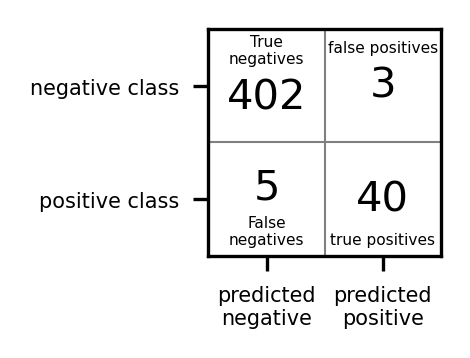

In [33]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)

print("Confusion matrix:\n", confusion)

plot_confusion_matrix(confusion)

Confusion matrix:
 [[393  12]
 [ 17  28]]


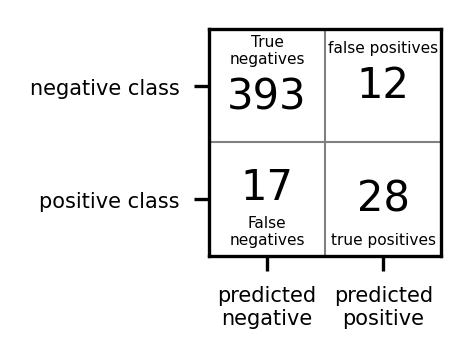

In [13]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_tree)

print("Confusion matrix:\n", confusion)

plot_confusion_matrix(confusion)

Confusion matrix:
 [[404   1]
 [  2  43]]


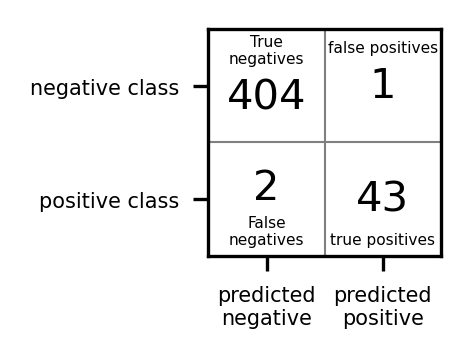

In [39]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, model_svc.predict(X_test))

print("Confusion matrix:\n", confusion)

plot_confusion_matrix(confusion)

In [15]:
from sklearn.metrics import f1_score


print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1 score tree: 0.66
f1 score logistic regression: 0.91


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tree,target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.96      0.97      0.96       405
        nine       0.70      0.62      0.66        45

    accuracy                           0.94       450
   macro avg       0.83      0.80      0.81       450
weighted avg       0.93      0.94      0.93       450



In [17]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, logreg.predict(X_test), target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      0.99      0.99       405
        nine       0.93      0.89      0.91        45

    accuracy                           0.98       450
   macro avg       0.96      0.94      0.95       450
weighted avg       0.98      0.98      0.98       450



# 多分类

目前我们所学分类模型都是两分类的，使用两分类模型也可以处理多分类情况，有下面两个思路：
* **一对其它**，One-vs-Rest (OvR)
* **一对一**, One-vs-One (OvO)


一对一的多分类处理相对一对其它来说要复杂一些，假设有$k$个分类，先选出一个分类，然后在选出其它的$k-1$个分类分别进行训练学习，总共需要训练$\frac{k(k-1)}{2}$个模型。

In [9]:
from sklearn.multiclass import OneVsOneClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)

classifier = LogisticRegression(solver='lbfgs', max_iter=2000)

ovo_logreg = OneVsOneClassifier(classifier)
ovo_logreg.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=2000))

In [10]:
ovo_logreg.decision_function(X_test).shape

(450, 10)

# 多分类的模型评价

对于多分类问题，有两种方法计算其性能评价指标：

*  "macro-average": 先按分类分别计算指标，再平均 

1. 将多分类问题拆解成$n$个“一对其余”的二分类问题，这样可以得到n个混淆矩阵
2. 分别计算出这些混淆矩阵的的precision和recall
3. 再将这些混淆矩阵的precision和recall值计算平均，即得到“macro-precision”，“macro-recall”，相应计算出的的F1值称为“宏F1”（macro-F1）。

* weighted

计算过程与macro-average类似，只是按supp作为权重计算平均，supp为分类所占的数量


* "micro-average": 先计算混淆矩阵的平均值，在计算指标

1. 将多分类问题拆解成$n$个一对其余的二分类问题，这样可以得到$n$个混淆矩阵
2. 计算这些混淆矩阵的TP，NP，FP，FN的平均值。
3. 再用这些平均值计算出precision、recall和F1等指标，分别称为“micro-precision”，“micro-recall”，和“micro-F1”。


>对于多分类问题，macro-average（宏平均） 要比 micro-average（微平均） 好，因为宏平均受样本数量少的类别影响较大。


* 多分类PR曲线和ROC曲线的绘制

对每个类别计算出样本在各个阈值下的假正率（FPR）和真正率（TPR），从而绘制出一条ROC曲线，这样总共可以绘制出n条ROC曲线，
对n条ROC曲线取平均，即可得到最终的ROC曲线。


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=42)

lr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)
lr.fit(X_train, y_train)

print(f"Train accuracy: { accuracy_score(y_train, lr.predict(X_train)) :.4f}")
print(f"Test accuracy: { accuracy_score(y_test, lr.predict(X_test)) :.4f}")

print("\nTrain confusion matrix:")
print(confusion_matrix(y_train, lr.predict(X_train)))

print("\nTest confusion matrix:")
print(confusion_matrix(y_test, lr.predict(X_test)))

Train accuracy: 0.9985
Test accuracy: 0.9622

Train confusion matrix:
[[133   0   0   0   0   0   0   0   0   0]
 [  0 136   0   0   0   0   0   0   0   0]
 [  0   0 133   0   0   0   0   0   0   0]
 [  0   0   0 137   0   0   0   0   0   0]
 [  0   0   0   0 136   0   0   0   0   0]
 [  0   0   0   0   0 136   0   0   0   0]
 [  0   0   0   0   0   0 136   0   0   0]
 [  0   0   0   0   0   0   0 134   0   0]
 [  0   0   0   1   0   0   0   0 130   0]
 [  0   0   0   1   0   0   0   0   0 134]]

Test confusion matrix:
[[44  0  0  0  1  0  0  0  0  0]
 [ 0 40  0  1  0  0  1  0  4  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  1  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  1  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0  2  2 41]]


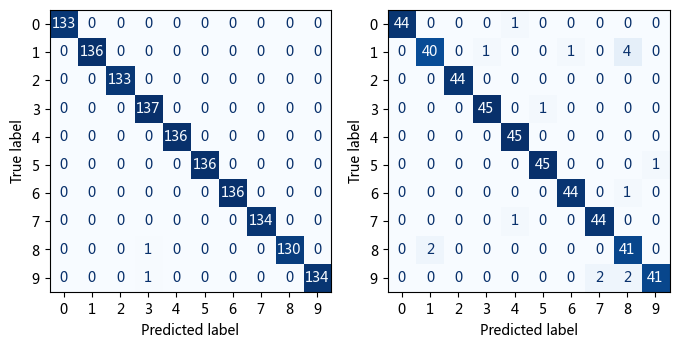

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(8,5), dpi=100)
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train, cmap="Blues", ax=axes[0], colorbar=False)
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap="Blues", ax=axes[1], colorbar=False)
plt.show()

In [44]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.88      0.98      0.93        46
           2       1.00      0.98      0.99        44
           3       0.94      1.00      0.97        46
           4       1.00      0.96      0.98        45
           5       0.98      0.96      0.97        46
           6       0.98      0.98      0.98        45
           7       0.98      0.96      0.97        45
           8       0.95      0.88      0.92        43
           9       0.96      0.96      0.96        45

    accuracy                           0.96       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



* mirco 从全局计算FP、FN和TP,然后计算相关指标
* macro 计算每个分类的相关指标，然后平均
* weight 计算每个分类的相关指标，然后按照suport加权平均

In [45]:
from sklearn.metrics import f1_score

score = f1_score(y_test, pred, average="micro")

print(f"Micro average f1 score: {score :.3f}")

score = f1_score(y_test, pred, average="macro")

print(f"Macro average f1 score: {score :.3f}")

Micro average f1 score: 0.964
Macro average f1 score: 0.964
